In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/Housing.csv')

**Convert Furnishing status to Numeric**

In [ ]:
furnishing_map = {'Unfurnished': 0, 'Semi-furnished': 1, 'Furnished': 2}
df['furnishingstatus'] = df['furnishingstatus'].map(furnishing_map)

df = df.apply(pd.to_numeric, errors='coerce')

print("DataFrame with Numeric Data:\n", df)

DataFrame with Numeric Data:
         price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3       NaN        NaN   
1    12250000  8960         4          4        4       NaN        NaN   
2    12250000  9960         3          2        2       NaN        NaN   
3    12215000  7500         4          2        2       NaN        NaN   
4    11410000  7420         4          1        2       NaN        NaN   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1       NaN        NaN   
541   1767150  2400         3          1        1       NaN        NaN   
542   1750000  3620         2          1        1       NaN        NaN   
543   1750000  2910         3          1        1       NaN        NaN   
544   1750000  3850         3          1        2       NaN        NaN   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0         N

**Min-Max Normalization**

In [ ]:
def min_max_normalize(df):
    return (df - df.min()) / (df.max() - df.min())

df_min_max = min_max_normalize(df)
print("Min-Max Normalization:\n", df_min_max)

Min-Max Normalization:
         price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0    1.000000  0.396564       0.6   0.333333  0.666667       NaN        NaN   
1    0.909091  0.502405       0.6   1.000000  1.000000       NaN        NaN   
2    0.909091  0.571134       0.4   0.333333  0.333333       NaN        NaN   
3    0.906061  0.402062       0.6   0.333333  0.333333       NaN        NaN   
4    0.836364  0.396564       0.6   0.000000  0.333333       NaN        NaN   
..        ...       ...       ...        ...       ...       ...        ...   
540  0.006061  0.092784       0.2   0.000000  0.000000       NaN        NaN   
541  0.001485  0.051546       0.4   0.000000  0.000000       NaN        NaN   
542  0.000000  0.135395       0.2   0.000000  0.000000       NaN        NaN   
543  0.000000  0.086598       0.4   0.000000  0.000000       NaN        NaN   
544  0.000000  0.151203       0.4   0.000000  0.333333       NaN        NaN   

     basement  hotwaterheat

**Z-Score Normalization**

In [ ]:
def z_score_normalize(df):
    return (df - df.mean()) / df.std()

df_z_score = z_score_normalize(df)
print("\nZ-score Normalization:\n", df_z_score)


Z-score Normalization:
         price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0    4.562174  1.045766  1.402131   1.420507  1.376952       NaN        NaN   
1    4.000809  1.755397  1.402131   5.400847  2.529700       NaN        NaN   
2    4.000809  2.216196  0.047235   1.420507  0.224204       NaN        NaN   
3    3.982096  1.082630  1.402131   1.420507  0.224204       NaN        NaN   
4    3.551716  1.045766  1.402131  -0.569663  0.224204       NaN        NaN   
..        ...       ...       ...        ...       ...       ...        ...   
540 -1.575421 -0.990968 -1.307661  -0.569663 -0.928544       NaN        NaN   
541 -1.603676 -1.267448  0.047235  -0.569663 -0.928544       NaN        NaN   
542 -1.612845 -0.705273 -1.307661  -0.569663 -0.928544       NaN        NaN   
543 -1.612845 -1.032440  0.047235  -0.569663 -0.928544       NaN        NaN   
544 -1.612845 -0.599289  0.047235  -0.569663  0.224204       NaN        NaN   

     basement  hotwaterhea

**Decimal Scaling Normalization**

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')

def decimal_scaling(df):
    max_values = df.max()
    j = max_values.fillna(0).apply(lambda x: len(str(int(x))))
    return df / (10 ** j)

df_decimal_scaling = decimal_scaling(df)
print("\nDecimal Scaling Normalization:\n", df_decimal_scaling)


Decimal Scaling Normalization:
         price    area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    0.133000  0.0742       0.4        0.2      0.3       NaN        NaN   
1    0.122500  0.0896       0.4        0.4      0.4       NaN        NaN   
2    0.122500  0.0996       0.3        0.2      0.2       NaN        NaN   
3    0.122150  0.0750       0.4        0.2      0.2       NaN        NaN   
4    0.114100  0.0742       0.4        0.1      0.2       NaN        NaN   
..        ...     ...       ...        ...      ...       ...        ...   
540  0.018200  0.0300       0.2        0.1      0.1       NaN        NaN   
541  0.017671  0.0240       0.3        0.1      0.1       NaN        NaN   
542  0.017500  0.0362       0.2        0.1      0.1       NaN        NaN   
543  0.017500  0.0291       0.3        0.1      0.1       NaN        NaN   
544  0.017500  0.0385       0.3        0.1      0.2       NaN        NaN   

     basement  hotwaterheating  airconditioning  parki

**K-means Discretisation**

In [ ]:
continuous_attrs = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]

# K-means discretization
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(continuous_attrs)

df['Discretized_Label'] = kmeans.labels_

print("Discretized Data:\n", df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])

Discretized Data:
         price  area  bedrooms  bathrooms  stories  parking
0    13300000  7420         4          2        3        2
1    12250000  8960         4          4        4        3
2    12250000  9960         3          2        2        2
3    12215000  7500         4          2        2        3
4    11410000  7420         4          1        2        2
..        ...   ...       ...        ...      ...      ...
540   1820000  3000         2          1        1        2
541   1767150  2400         3          1        1        0
542   1750000  3620         2          1        1        0
543   1750000  2910         3          1        1        0
544   1750000  3850         3          1        2        0

[545 rows x 6 columns]


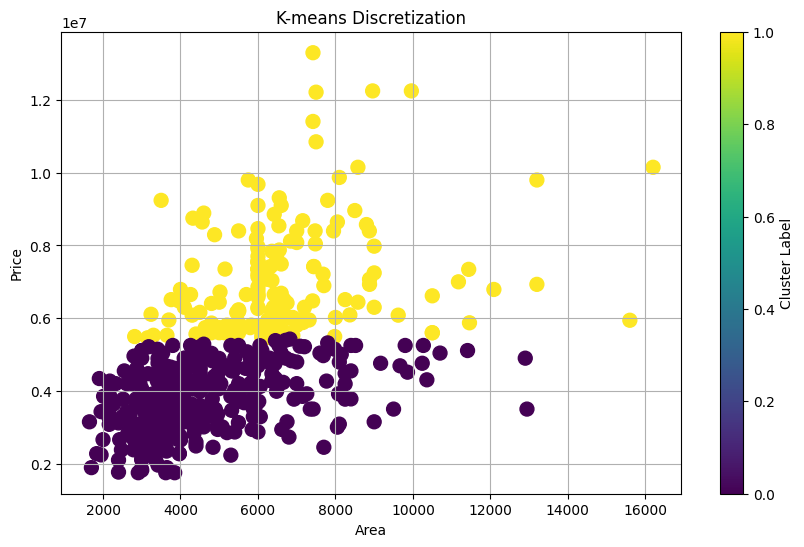

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], c=df['Discretized_Label'], cmap='viridis', marker='o', s=100)
plt.title('K-means Discretization')
plt.xlabel('Area')
plt.ylabel('Price')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()